# Probability distributions
A probability distribution describe the probabilities of all possible outcomes for a random variable Y. In the discrete case it can be represented as a table or graph and in the continuous case is the area under the curve of a probability. 



In [1]:
# Author: Alejandro Puerto Castro 
#         with contributions from Mario Campos

In [2]:
# Required libraries
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Discrete distribution class
Let's define a simple discrete distribution class to explore how the probabilities are calculated in the case of discrete variables..

In [3]:
class DiscreteDistribution:
    
    def __init__(self, sample_space):
        self.sample_space = sample_space
        self.distribution = {}
        for event in sample_space:
            self.distribution[event] = self.calculateProbability(event)
        self.experiments = 0
        print(self.distribution)
    
    def estimate(self, observations):
        distribution = {}
        for event in observations:
            if event in distribution:
                distribution[event] += 1
            else:
                distribution[event] = 1
                
        for event, value in distribution.items():
            distribution[event] /= len(observations)
        return distribution
    
    def calculateProbability(self, y):
        if y in self.sample_space and len(self.sample_space) > 0:
            return 1/len(self.sample_space)
        return 0
    
    def probabilityOfSampleSpace(self):
        sum = 0
        for event in self.sample_space:
            sum += self.calculateProbability(event)
        return sum
    
    def runEvent(self, variance_factor = 0.01):
        observation = random.random()
        accumulate = 0
        for event, probability in self.distribution.items():
            accumulate += probability
            if accumulate >= observation:
                accumulate = 0
                return event
        return self.runEvent(variance_factor)
                
            
    def simulateExperiment(self, variance_factor  = 0.01):
        value = self.runEvent()
        self.experiments += 1
        if self.experiments == len(self.sample_space):
            self.experiments = 0
            self.generator = None
        return value
    
    def plot(self, order_labels = None):
        labels = []
        probabilities = []
        for event, probability in self.distribution.items():
            labels.append(event)
            probabilities.append(probability)
        
        if order_labels is not None:
            labels.sort(key = order_labels)
            probabilities = []
            for l in labels:
                probabilities.append(self.distribution[l])
        x = np.arange(len(labels))  # the label locations
        width = 0.35  # the width of the bars
        fig, ax = plt.subplots()
        rects = ax.bar(x, probabilities, width, label = 'Probability')
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Probabilities')
        ax.set_title('Probability distribution')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        ax = self.autolabel(rects, ax)
        fig.tight_layout()
        plt.ylim(0, max(probabilities)*1.2)
        plt.show()
        
    def autolabel(self, rects, ax):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = self.truncate(rect.get_height(), 3)
            ax.annotate(str(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        return ax

    def truncate(self, number, digits):
        stepper = 10.0 ** digits
        return math.trunc(stepper * number) / stepper
    
    def expectedValue(self):
        expected_value = 0
        for y, py in self.distribution.items():
            if isinstance(y, int):
                expected_value += y*py
        return expected_value
    
    def variance(self):
        variance = 0
        for y, py in self.distribution.items():
            if isinstance(y, int):
                variance += ((y-self.expectedValue())**2)*py
        return variance
        

The discrete distribution class defined before receives a sample space and defines a function to compute the probability, we can extend this class to explore different probabilities.

There are different discrete distributions. For example, binomial, geometric, hypergeometric, and poisson. In this notebook are coded the discrete distributions mentioned.

In [4]:
def printDistribution(probability_distribution):
    """
    This function encompasses the plot for the probability distribution passed as argument;
    also, prints its expected value and its variance.
    """
    probability_distribution.plot()
    print("Expected value: " + str(probability_distribution.expectedValue()))
    print("Variance: " + str(probability_distribution.variance()))

## Binomial distribution

In [5]:
class BinomialDistribution(DiscreteDistribution):
    
    """
    Computes a binomial distribution with parameters n (number of trials) and p (probability of success
    on a single trial, which remains the same from trial to trial).
    
    The sample space in this distribution is from 0 to the number of trials (n).
    """
    
    def __init__(self, n, p):
        self.sample_space = range(n + 1)
        self.n = n #number of trials
        self.p = p #probability of success
        self.q = 1 - p #probability of failure
        self.distribution = {}
        for event in self.sample_space:
            self.distribution[event] = self.calculateProbability(event)
        self.experiments = 0
        print(self.distribution)
    
    def calculateProbability(self, y):
        """
        This function calculates the probability of a random variable of interest Y, which is the
        number of successes observed during the n trials.
        """
        exp = self.p**y * self.q**(self.n -y)
        return self.getCombinations(self.n, y)*exp
    
    def getCombinations(self, n, r):
        """
        Computes the combination of n and variable r based on the formula for calculating probability.
        """
        return (np.math.factorial(n)/(np.math.factorial(n-r)))/np.math.factorial(r)
    
    def expectedValue(self):
        return self.n*self.p
    
    def variance(self):
        return self.n*self.p*self.q

### Binomial example

**Example:** Experience has shown that 30\% of all persons afflicted by a certain illness recover. A drug company has developed a new medication. Ten people with the illness were selected at random and received the medication; nine recovered shortly thereafter. Suppose that the medication was absolutely worthless. What is the probability that at least nine of ten receiving the medication will recover?

In [6]:
example = BinomialDistribution(10, 0.3)

{0: 0.028247524899999984, 1: 0.12106082099999993, 2: 0.23347444049999985, 3: 0.2668279319999999, 4: 0.20012094899999994, 5: 0.10291934519999994, 6: 0.03675690899999998, 7: 0.009001691999999995, 8: 0.0014467004999999993, 9: 0.00013778099999999993, 10: 5.9048999999999975e-06}


In [7]:
nine_recoveries = example.calculateProbability(9)
print("Probability of 9 recoveries is: " + str(nine_recoveries))
ten_recoveries = example.calculateProbability(10)
print("Probability of 10 recoveries is: " + str(ten_recoveries))
print("Probability of at least 9 out of 10 people receiving medication will recover is: " + str(nine_recoveries+ten_recoveries))


Probability of 9 recoveries is: 0.00013778099999999993
Probability of 10 recoveries is: 5.9048999999999975e-06
Probability of at least 9 out of 10 people receiving medication will recover is: 0.00014368589999999993


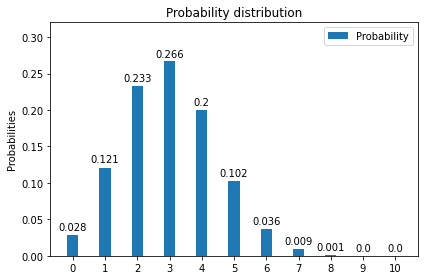

Expected value: 3.0
Variance: 2.0999999999999996


In [8]:
printDistribution(example)

In [9]:
print("Sample space probability: " + str(example.probabilityOfSampleSpace()))

Sample space probability: 0.9999999999999992


**Example:** Suppose that a lot of 5000 electrical fuses contains 5% defectives. If a sample of
5 fuses is tested, find the probability of observing at least one defective.

In [10]:
example = BinomialDistribution(5, .05)

{0: 0.7737809374999998, 1: 0.2036265625, 2: 0.021434375, 3: 0.0011281250000000002, 4: 2.9687500000000007e-05, 5: 3.125000000000001e-07}


In [11]:
print("The probability that at least one fuse is defective is: " + str(1-round(example.calculateProbability(0), 5)))

The probability that at least one fuse is defective is: 0.22621999999999998


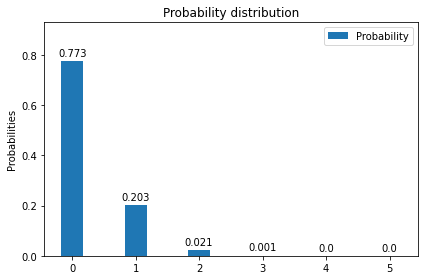

Expected value: 0.25
Variance: 0.2375


In [12]:
printDistribution(example)

In [13]:
print("Sample space probability: " + str(example.probabilityOfSampleSpace()))

Sample space probability: 0.9999999999999998


### Binomial precision

Based on the probabilityOfSampleSpace function, we can know the precision or reliability of the computation of probabilities as they must sum up to 1.

In this case, the probability of sample space for this distribution implementation sum up to 0.99. We can take it as reliable.

The binomial probability distribution has many applications because the binomial experiment occurs in sampling for defectives in industrial quality control, in the sampling of consumer preference or voting populations, and in many other physical situations for mentioning some examples.

## Geometric distribution

In [14]:
class GeometricDistribution(DiscreteDistribution):
    
    """
    Computes a Geometric distribution with p as argument, which is the probability of succes of some event.
    
    The sample space of the distribution is, in this case, from 1 to the expected value, because this distribution
    could go on indefinitely.
    """
    
    def __init__(self, p):
        self.p = p #probability of success
        self.q = 1 - p #probability of failure
        self.sample_space = range(1, int(self.expectedValue())+1) #sample space from 1 to expected value (1/p)
        self.distribution = {}
        for event in self.sample_space:
            self.distribution[event] = self.calculateProbability(event)
        self.experiments = 0
        print(self.distribution)
    
    def calculateProbability(self, k):
        """
        Computes the probability of the random variable k, which is the number of the trial on which
        the first success occurs.
        """
        return (self.q**(k - 1)) * self.p
 
    
    def expectedValue(self):
        return 1/self.p
    
    def variance(self):
        return self.q / (self.p**2)

### Geometric example

**Example:** Then the probability of engine malfunction, $p = 0.02$, during any randomly observed one-hour interval of operation might be the same as for any other one-hour interval. The length of time prior to engine malfunction is the number of one-hour intervals, Y , until the first malfunction.

In [15]:
example = GeometricDistribution(0.02)

{1: 0.02, 2: 0.0196, 3: 0.019208, 4: 0.018823839999999998, 5: 0.018447363199999997, 6: 0.018078415936, 7: 0.01771684761728, 8: 0.0173625106649344, 9: 0.01701526045163571, 10: 0.016674955242602995, 11: 0.016341456137750933, 12: 0.016014627014995918, 13: 0.015694334474696, 14: 0.015380447785202077, 15: 0.015072838829498034, 16: 0.014771382052908075, 17: 0.014475954411849913, 18: 0.014186435323612913, 19: 0.013902706617140655, 20: 0.013624652484797842, 21: 0.013352159435101886, 22: 0.013085116246399846, 23: 0.012823413921471849, 24: 0.012566945643042414, 25: 0.012315606730181566, 26: 0.012069294595577934, 27: 0.011827908703666375, 28: 0.011591350529593045, 29: 0.011359523519001184, 30: 0.011132333048621162, 31: 0.010909686387648738, 32: 0.010691492659895763, 33: 0.010477662806697848, 34: 0.01026810955056389, 35: 0.010062747359552614, 36: 0.00986149241236156, 37: 0.00966426256411433, 38: 0.009470977312832042, 39: 0.0092815577665754, 40: 0.009095926611243893, 41: 0.008914008079019015, 42: 0

In [16]:
one_hour = example.calculateProbability(1)
two_hour = example.calculateProbability(2)
survive_two_hours = 1 - (one_hour + two_hour)
print("The probability that an engine malfunction in the first hour is: " + str(round(one_hour, 4)))
print("The probability that an engine malfunction in the second hours is: " + str(round(two_hour, 4)))
print("The probability that an engine will survive two hours is: " + str(round(survive_two_hours, 4)))

The probability that an engine malfunction in the first hour is: 0.02
The probability that an engine malfunction in the second hours is: 0.0196
The probability that an engine will survive two hours is: 0.9604


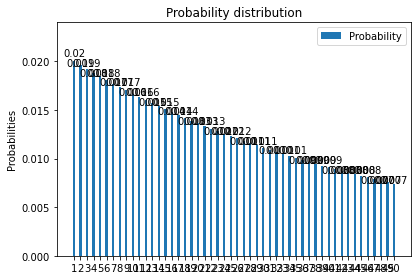

Expected value: 50.0
Variance: 2450.0


In [17]:
printDistribution(example)

In [18]:
print("Sample space probability: " + str(example.probabilityOfSampleSpace()))

Sample space probability: 0.6358303199128826


### Geometric precision

Based on the probabilityOfSampleSpace function, we can know the precision or reliability of the computation of probabilities as they must sum up to 1.

In this case, the probability of sample space for this distribution implementation is much less than 1 because this distribution could go on indefinitely. We cannot take it as fully precise, but it depends on the point of view.

The geometric distribution is often used to model distributions of lengths of waiting times.

## Hypergeometric distribution

In [19]:
class HypergeometricDistribution(DiscreteDistribution):
    
    """
    Computes a Hypergeometric distribution selecting a sample of elements (n) from a population (N) to know
    the probability that a given characteristic (M) is present in the sample.
    
    The sample space is from 0 to the sample size.
    """
    
    def __init__(self, N, n, M):
        self.sample_space = range(n + 1)
        self.N = N #population size
        self.n = n #sample size or number of draws
        self.M = M #number of success states in the population
        self.total = N #total of cases
        self.good = M #success
        self.bad = self.total - self.good #failure
        self.distribution = {}
        for event in self.sample_space:
            self.distribution[event] = self.calculateProbability(event)
        self.experiments = 0
        print(self.distribution)
    
    def calculateProbability(self, k): #probability mass function
        """
        Computes the probability that an element (k) is present in the sample (n).
        
        This follows the formula for calculating the combinations for the total number of cases, success cases,
        and failure cases for a given element k.
        """
        numerator_1 = (np.math.factorial(self.good)/(np.math.factorial(self.good-k)))/np.math.factorial(k)
        numerator_2 = (np.math.factorial(self.bad)/(np.math.factorial(self.bad-(self.n-k))))/np.math.factorial((self.n-k))
        denominator = (np.math.factorial(self.total)/(np.math.factorial(self.total-self.n)))/np.math.factorial(self.n)
        return (numerator_1*numerator_2)/denominator
    
    def expectedValue(self):
        return self.n * (self.M/self.N)
    
    def variance(self):
        #return (self.M-self.n)*self.n*self.N*(self.M - self.N)*1.0/(self.M*self.M*(self.M-1)) #another way
        return self.n * (self.M/self.N) * ((self.N-self.M)/self.N) * ((self.N-self.n)/(self.N-1))

### Hypergeometric example

**Example:** From a group of 20 Ph.D. engineers, 10 are randomly selected for
employment. What is the probability that the 10 selected include
all the 5 best engineers in the group of 20?

In [20]:
example = HypergeometricDistribution(N=20, M=10, n=5)

{0: 0.016253869969040248, 1: 0.13544891640866874, 2: 0.34829721362229105, 3: 0.34829721362229105, 4: 0.13544891640866874, 5: 0.016253869969040248}


In [21]:
print("The probability that all the 5 best engineers are among the ten selected is: " + str(round(example.calculateProbability(5), 4)))

The probability that all the 5 best engineers are among the ten selected is: 0.0163


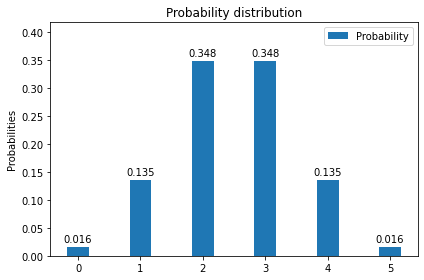

Expected value: 2.5
Variance: 0.986842105263158


In [22]:
printDistribution(example)

In [23]:
print("Sample space probability: " + str(example.probabilityOfSampleSpace()))

Sample space probability: 1.0


**Example:** An industrial product is shipped in lots of 20. Testing to determine whether an item
is defective is costly, and hence the manufacturer samples his production rather than
using a 100% inspection plan. A sampling plan, constructed to minimize the number
of defectives shipped to customers, calls for sampling five items from each lot and
rejecting the lot if more than one defective is observed. (If the lot is rejected, each
item in it is later tested.) If a lot contains four defectives, what is the probability that it will be rejected? What is the expected number of defectives in the sample of size 5?
What is the variance of the number of defectives in the sample of size 5?

In [24]:
example = HypergeometricDistribution(N=20, M=5, n=4)

{0: 0.28173374613003094, 1: 0.4695562435500516, 2: 0.21671826625386997, 3: 0.030959752321981424, 4: 0.0010319917440660474}


In [25]:
none_defective = example.calculateProbability(0)
one_defective = example.calculateProbability(1)
reject_lot = 1-(none_defective+one_defective)
print("The probability that there are none defective is: " + str(round(none_defective, 4)))
print("The probability that there is one defective is: " + str(round(one_defective, 4)))
print("The probability of rejecting the lot (or that there is more than one defective) is: " + str(round(reject_lot, 4)))

The probability that there are none defective is: 0.2817
The probability that there is one defective is: 0.4696
The probability of rejecting the lot (or that there is more than one defective) is: 0.2487


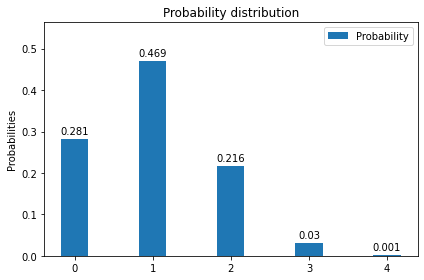

Expected value: 1.0
Variance: 0.631578947368421


In [26]:
printDistribution(example)

In [27]:
print("Sample space probability: " + str(example.probabilityOfSampleSpace()))

Sample space probability: 1.0


### Hypergeometric precision

Based on the probabilityOfSampleSpace function, we can know the precision or reliability of the computation of probabilities as they must sum up to 1.

In this case, the probability of sample space for this distribution implementation sums up to 1. So, we can take it as precise and reliable.

## Poisson distribution

In [28]:
class PoissonDistribution(DiscreteDistribution):
    
    """
    Computes a Poisson distribution for an average number of occurrences (mu) of a specified event in any given unit of time or space.
    
    The sample size, in this case, is from 0 to the number of average occurrences because this distribution
    could go on indefinitely.
    """
    
    def __init__(self, mu):
        self.sample_space = range(mu + 1)
        self.mu = mu #average number of occurrences
        self.distribution = {}
        if self.mu > 0:
            for event in self.sample_space:
                self.distribution[event] = self.calculateProbability(event)
            self.experiments = 0
            print(self.distribution)
        else: pass
    
    def calculateProbability(self, k):
        """
        Computes the probability that an event k occurs during an average of events (mu) are expected to occur.
        """
        return np.exp(-self.mu)*((self.mu**k)/np.math.factorial(k))
    
    def expectedValue(self):
        return self.mu
    
    def variance(self):
        return  self.mu

### Poisson example

**Example:** A certain type of tree has seedlings randomly dispersed in a large area, with the mean
density of seedlings being approximately five per square yard. If a forester randomly
locates ten 1-square-yard sampling regions in the area, find the probability that none
of the regions will contain seedlings.

In [29]:
example = PoissonDistribution(5)

{0: 0.006737946999085467, 1: 0.03368973499542734, 2: 0.08422433748856833, 3: 0.14037389581428056, 4: 0.1754673697678507, 5: 0.1754673697678507}


In [30]:
print("The probability that none of the regions will contain seedlings is: " + str(round(example.calculateProbability(0), 4)))

The probability that none of the regions will contain seedlings is: 0.0067


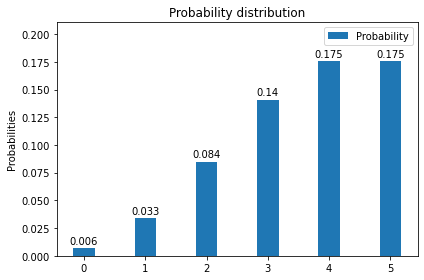

Expected value: 5
Variance: 5


In [31]:
printDistribution(example)

In [32]:
print("Sample space probability: " + str(example.probabilityOfSampleSpace()))

Sample space probability: 0.6159606548330632


### Poisson precision

Based on the probabilityOfSampleSpace function, we can know the precision or reliability of the computation of probabilities as they must sum up to 1.

In this case, the probability of sample space for this distribution implementation is much less than 1 because this distribution could go on indefinitely. We cannot take it as fully precise, but it depends on the point of view.

The Poisson probability distribution often provides a good model for the probability distribution of a number of rare events that occur in space, time, volume, or any other dimension, where we have an average value of some event. It provides a good model for any type of accidents in a given unit of time; also, for number of telephone calls handled by a switchboard in a time interval, the number of radioactive particles that decay in a particular time period, the number of errors a typist makes in typing a page, and the number of automobiles using a freeway access ramp in a ten-minute interval, for mentioning some examples.

# Continuous distribution class

There are different continuous distributions. For example, uniform, normal, gamma, exponential, and beta. In this notebook are coded the continuous distributions mentioned.

In [33]:
class ContinuousDistribution:
    
    """
    A continuos distribution is computed in this class.
    A density function is computed in the correspondant method.
    The probability of a random variable is computed by integrating the density function and represented
    as areas under curves.
    """
    
    def __init__(self, **parameters):
        #initialize the paramters of the distribution
        for k, v in parameters.items():
            setattr(self, k, v)
        
        
    def densityFunction(self, x):
        #Calculate the density function and return it as a vectorizable function
        if k >= self.theta1 and k <= self.theta2:
            return 1/(self.theta2 - self.theta1)
        else:
            return 0
    
    def vectorizedDensity(self):
        return np.vectorize(self.densityFunction)
    
    def integrate(self, f, a, b, steps = 50, plot=False):
        #Here you must implement your integration method as described above
        step_size = (b-a)/steps
        x = np.linspace(a, b, steps)
        y = f(x)
        integral = np.sum(y*step_size)
        if plot is True:
            self.plotFunction(x, y)
        return integral
    
    def plotFunction(self, x, y):
        plt.plot(x,y, color='r')
        plt.fill_between(x,y)
        plt.xlim([x[0],x[-1]])
        plt.ylim([0, max(y) + 1])
        plt.show()
        
    def probability(self, a, b):
        #Here you should approximate the integral of the density function in the 
        #interval a, b, using the steps you need (depending on the complexity of the density function)
        probability = self.integrate(self.vectorizedDensity(), a, b)
        return probability
    
    def expectedValue(self):
        #Here you will calculate the expected value of the probability function and return it
        expected_value = None
        return expected_value
    
    def variance(self):
        #Here you will calculate the expected value of the probability function and return it
        variance = None
        return variance

## Uniform distribution

In [34]:
class UniformDistribution(ContinuousDistribution):
    
    """
    Computes a Uniform distribution for a given interval (theta1, theta2).
    """
    
    def __init__(self, theta1, theta2):
        self.theta1 = theta1
        self.theta2 = theta2
        
    def densityFunction(self, k):
        """
        Computes the density function of an event k.
        """
        if k >= self.theta1 and k <= self.theta2:
            return 1/(self.theta2 - self.theta1)
        else:
            return 0
    
    def probability(self, a, b):
        """
        Computes the probability of an interval (a, b) and presents it as areas under curves.
        """
        probability = self.integrate(self.vectorizedDensity(), a, b, steps=50, plot=True)
        return probability
    
    def expectedValue(self):
        return (self.theta1 + self.theta2)/2
    
    def variance(self):
        return ((self.theta2 - self.theta1)**2)/12

### Uniform example

**Example:** Arrivals of customers at a checkout counter follow a Poisson distribution. It is known
that, during a given 30-minute period, one customer arrived at the counter. Find
the probability that the customer arrived during the last 5 minutes of the 30-minute
period.

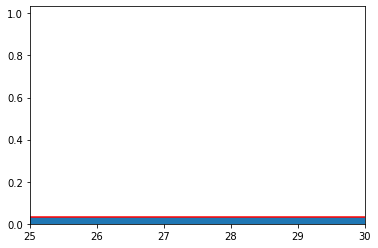

The probability that a customer arrives during the last 5 minutes is: 0.1667
Expected value:  15.0
Variance:  75.0


In [35]:
uniform = UniformDistribution(theta1 = 0, theta2=30)
print("The probability that a customer arrives during the last 5 minutes is: " + str(round(uniform.probability(25, 30), 4)))
print("Expected value: ",uniform.expectedValue())
print("Variance: ", uniform.variance())

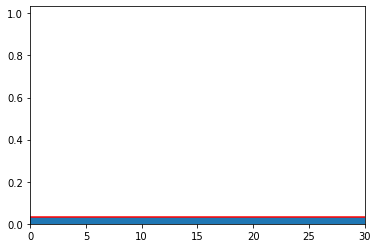

1.0


In [36]:
print(uniform.probability(0, 30))

### Uniform precision

Based on the property that the sum of all probabilities of a distribution must be 1, we can see that this uniform distribution is reliable as we can see in the test above.

The uniform distribution is used by some random variables in the physical, management, and biological sciences because they have approximately this distribution.

## Normal distribution

In [37]:
class NormalDistribution(ContinuousDistribution):
    
    """
    Computes a Normal distribution with parameters mu, which is the mean of some observed events, and sigma,
    which is the dispersion of mu.
    """
    
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
    
    def densityFunction(self, k):
        """
        Computes the density function of an event k present in an interval of observations.
        """
        exp = np.exp(-(((k - self.mu)**2)/(2*self.sigma**2)))
        return ((1/(self.sigma*np.sqrt(2*np.pi)))*exp)
                
    def probability(self, a, b):
        """
        Computes the probability of events in a given interval (a, b) and represents it as area under curve.
        """
        if self.sigma > 0:
            probability = self.integrate(self.vectorizedDensity(), a, b, steps=100, plot=True)
            return probability
        else: pass
    
    def expectedValue(self):
        return self.mu
    
    def variance(self):
        return self.sigma**2

### Normal example

**Example:** The achievement scores for a college entrance examination are
normally distributed with mean 75 and standard deviation 10.
What fraction of the scores lies between 80 and 90?

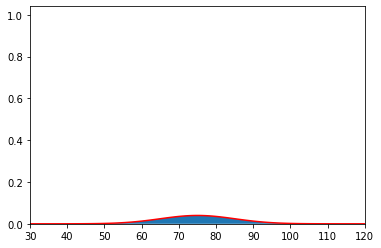

The fraction of scores that lies between 80 and 90 is: 0.2417
Expected value:  75
Variance:  100


In [38]:
normal = NormalDistribution(mu = 75, sigma=10)
print("The fraction of scores that lies between 80 and 90 is: " + str(round(normal.probability(80, 90), 4)))
print("Expected value: ",normal.expectedValue())
print("Variance: ", normal.variance())

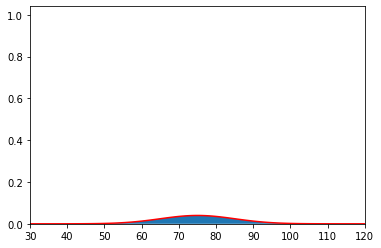

0.6806857171595393


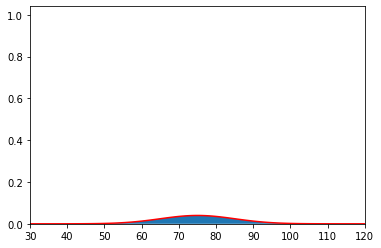

0.9470852921522199


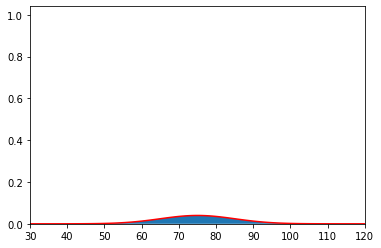

0.9875850578553711


In [39]:
print(normal.probability(75-10, 75+10))
print(normal.probability(75-10*2, 75+10*2))
print(normal.probability(75-10*3, 75+10*3))

### Normal precision

The normal ditribution is based on the 68-95-99.7 empirical rule, or the 3-sigma rule, that says that about 68% of values drawn from a normal distribution are within one standard deviation (sigma) away from the mean; about 95% of the values lie within two standard deviations; and about 99.7% are within three standard deviations.

In this distribution implementation, one out of three cases are not precisely fulfilled: the last case of three standard deviations. We can take this example as reliable for values closer to the mean.

The normal distribution is often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. 

## Gamma distribution

In [40]:
class GammaDistribution(ContinuousDistribution):
    
    """
    Computes a Gamma distribution with parameters alpha and beta. Parameter beta is generally called the scale
    parameter, and alpha the shape parameter.
    """
    
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    
    def densityFunction(self, k):
        """
        Computes the density function for a given event k present in the interval (a,b).
        """
        if k >= 0:
            numerator = (k**(self.alpha-1))*(np.exp(-(k/self.beta)))
            denominator = (self.beta**self.alpha)*math.gamma(self.alpha)
            return numerator/denominator
        else: return 0
    
    def probability(self, a, b):
        """
        Computes the probability of events in the interval (a,b) and represents it as area under curve.
        """
        if self.alpha > 0 and self.beta > 0:
            probability = self.integrate(self.vectorizedDensity(), a, b, steps=1000, plot=True)
            return probability
        else: pass
    
    def expectedValue(self):
        return self.alpha*self.beta
    
    def variance(self):
        return self.alpha*(self.beta**2)

### Gamma example

**Example:** Suppose you are fishing and you expect to get a fish once every 1/2 hour. Compute the probability that you will have to wait between 2 to 4 hours before you catch 4 fish. 

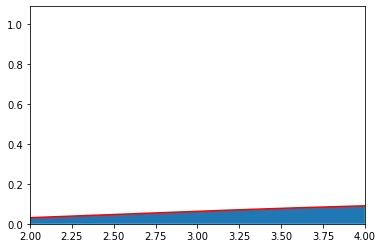

Probability that I will have to wait between 2 to 4 hours before I catch 4 fish is: 0.1239
Expected value:  8
Variance:  16


In [41]:
gamma = GammaDistribution(alpha = 4, beta=2)
print("Probability that I will have to wait between 2 to 4 hours before I catch 4 fish is: " +str(round(gamma.probability(2, 4), 4)))
print("Expected value: ",gamma.expectedValue())
print("Variance: ", gamma.variance())

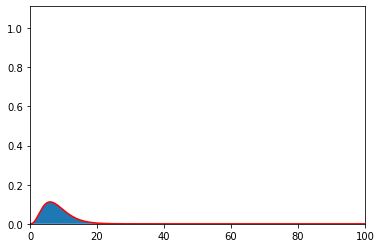

0.9990000087014574


In [42]:
print(gamma.probability(0, 100))


**Example:** An insurance company observes that large commercial fire claims occur randomly in time with a mean of 0.7 years between claims. For its financial planning it would like to estimate how long it will be before it pays out the 5th such claim, 

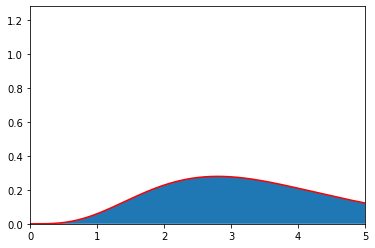

Probability that the 5th claim pays out is: 0.8391
Expected value:  3.5
Variance:  2.4499999999999997


In [43]:
gamma = GammaDistribution(alpha = 5, beta=0.7)
print("Probability that the 5th claim pays out is: "+str(round(gamma.probability(0, 5), 4)))
print("Expected value: ",gamma.expectedValue())
print("Variance: ", gamma.variance())

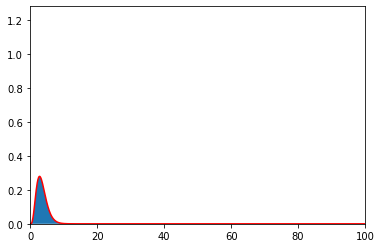

0.999000001407403


In [44]:
print(gamma.probability(0, 100))


**Example:** Suppose the time spent by a randomly selected student who uses a terminal connected to a local time-sharing computer facility has a gamma distribution with mean 20 min and variance $80 min^2$.

$$\alpha\beta = 20$$ and $$\alpha\beta^2 = 80 $$

$$\alpha = 5 $$ and $$\beta = 4 $$

What is the probability that a student uses the terminal for at most 24 min?

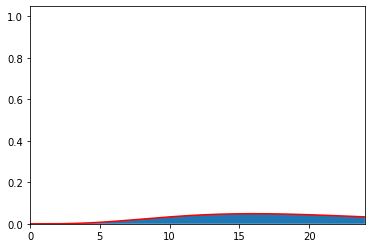

Probability that a student uses the terminal for at most 24 minutes is: 0.7146
Expected value:  20
Variance:  80


In [45]:
gamma = GammaDistribution(alpha = 5, beta=4)
print("Probability that a student uses the terminal for at most 24 minutes is: " + str(round(gamma.probability(0, 24), 4)))
print("Expected value: ",gamma.expectedValue())
print("Variance: ", gamma.variance())

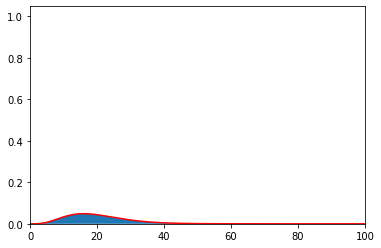

0.9989997361742167


In [46]:
print(gamma.probability(0, 100))

### Gamma precision

Based on the property that the sum of all probabilities of a distribution must be 1, we can see that this gamma distribution approximates to 1 in the interval (0,100), but this is just an approximation that we cannot say it's true because the gamma distribution can go on indefinitely for a real sum up to 1. So, we cannot say that this gamma distribution implementation is completely reliable.

The gamma distribution is often used for modeling waiting times, life testing, insurance claims, for mentioning some examples.

## Exponential distribution

In [47]:
class ExponentialDistribution(ContinuousDistribution):
    
    """
    Computes the exponential distribution (which is a special case of the gamma distribution in which alpha
    always is 1) with parameter beta greater than 0.
    """
    
    def __init__(self, beta):
        self.alpha = 1
        self.beta = beta
    
    def densityFunction(self, k):
        """
        Computes the density function of the exponential distribution.
        """
        if k >= 0:
            exp = np.exp(-(k/self.beta))
            return (1/self.beta)*exp
        else: return 0
    
    def probability(self, a, b):
        if self.beta > 0:
            probability = self.integrate(self.vectorizedDensity(), a, b, steps=1000, plot=True)
            return probability
        else: pass
    
    def expectedValue(self):
        return self.beta
    
    def variance(self):
        return self.beta**2

### Exponential example

**Example:** Students arrive at a local bar and restaurant according to an approximate Poisson process at a mean rate of 30 students per hour. What is the probability that the bouncer has to wait more than 3 minutes to card the next student?

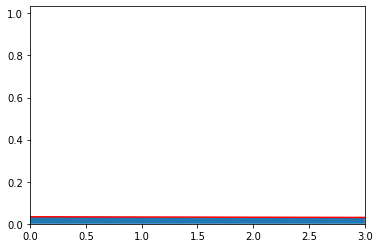

Probability that the bouncer has to wait more than 3 minutes to card the next student is 0.9048
Expected value:  30
Variance:  900


In [48]:
exponential = ExponentialDistribution(beta=30)
print("Probability that the bouncer has to wait more than 3 minutes to card the next student is " + str(round(1-exponential.probability(0, 3), 4)))
print("Expected value: ",exponential.expectedValue())
print("Variance: ", exponential.variance())

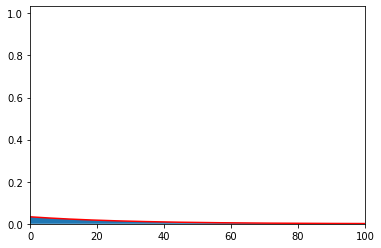

0.9650886977564133


In [49]:
print(exponential.probability(0, 100))

**Example:** Suppose the response time X at a certain on-line computer terminal (the elapsed timebetween the end of a user’s inquiry and the beginning of the system’s response tothat inquiry) has an exponential distribution with expected response time equal to 5sec.Find the probability that the response time is between 5 and 10 sec.

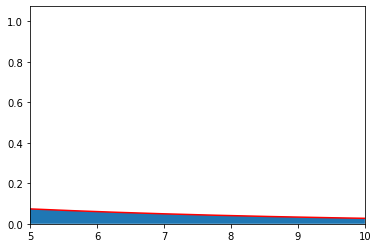

Probability that the response time is between 5 and 10 seconds is 0.2326
Expected value:  5
Variance:  25


In [50]:
exponential = ExponentialDistribution(beta=5)
print("Probability that the response time is between 5 and 10 seconds is "+str(round(exponential.probability(5, 10), 4)))
print("Expected value: ",exponential.expectedValue())
print("Variance: ", exponential.variance())

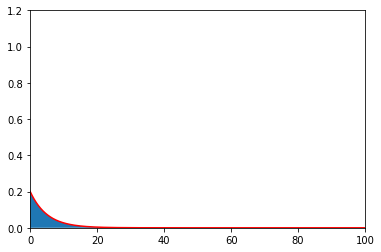

1.0090333644385956


In [51]:
print(exponential.probability(0, 100))

### Exponential precision

Based on the property that the sum of all probabilities of a distribution must be 1, we can see that this exponential distribution approximates to 1 in the interval (0,100), but this is just an approximation that we cannot say it's true because the exponential distribution, like gamma distribution, can go on indefinitely for a real sum up to 1. So, we cannot say that this distribution implementation is completely reliable.

The exponential distribution is often used for modeling lengths of inter-arrival times, the time until the next phone call arrives in a constant rate of incoming phone calls in a time interval, for mentioning some examples.

## Beta distribution

In [52]:
class BetaDistribution(ContinuousDistribution):
    
    """
    Computes the beta distribution with parameters alpha and beta. Both of them should be greater than 0.
    """
    
    def __init__(self, alpha, beta):
        self.alpha = alpha
        self.beta = beta
    
    def densityFunction(self, k):
        """
        Computes the density function of a given event in the interval (a,b). This event should be
        enclosed between 0 and 1. 
        """
        if k >= 0 and k <= 1:
            numerator = ((k**(self.alpha-1))*((1-k)**(self.beta-1)))
            denominator = (math.gamma(self.alpha)*math.gamma(self.beta))/(math.gamma(self.alpha+self.beta))
            return numerator/denominator
        else: return 0
    
    def probability(self, a, b):
        if self.alpha > 0 and self.beta > 0:
            probability = self.integrate(self.vectorizedDensity(), a, b, steps=1000, plot=True)
            return probability
        else: pass
    
    def expectedValue(self):
        return self.alpha/(self.alpha+self.beta)
    
    def variance(self):
        return (self.alpha*self.beta)/(((self.alpha+self.beta)**2)*(self.alpha+self.beta+1))

### Beta example

**Example:** Tanya enters a raffle at the local fair, and is wondering what her chances of winning are. If her probability of winning can be modeled by a beta distribution with α = 5 and β = 2, what is the probability that she has at most a 10% chance of winning? 

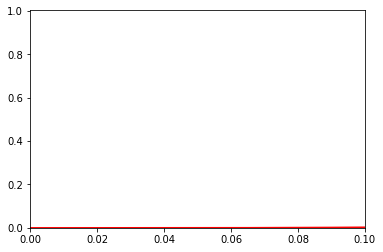

Probability that Tanya has at most a 10% change of winning is 0.0001
Expected value:  0.7142857142857143
Variance:  0.025510204081632654


In [53]:
beta = BetaDistribution(alpha = 5, beta=2)
print("Probability that Tanya has at most a 10% change of winning is " + str(round(beta.probability(0, 0.1), 4)))
print("Expected value: ",beta.expectedValue())
print("Variance: ", beta.variance())

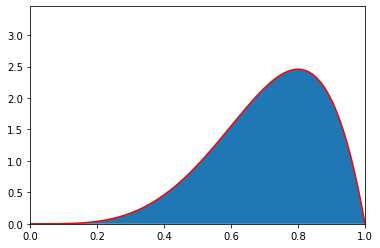

0.998997497499002


In [54]:
print(beta.probability(0, 1))

**Example:** Suppose, if in a basket there are balls which are defective with a Beta distribution of α=5 and β=2 . Compute the probability of defective balls in the basket from 20% to 30%.

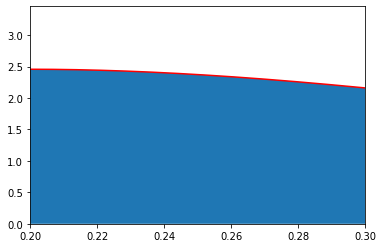

Probability of defective balls in the basket from 20% to 30% is 0.2352
Expected value:  0.2857142857142857
Variance:  0.025510204081632654


In [55]:
beta = BetaDistribution(alpha = 2, beta=5)
print("Probability of defective balls in the basket from 20% to 30% is "+str(round(beta.probability(0.2, 0.3), 4)))
print("Expected value: ",beta.expectedValue())
print("Variance: ", beta.variance())

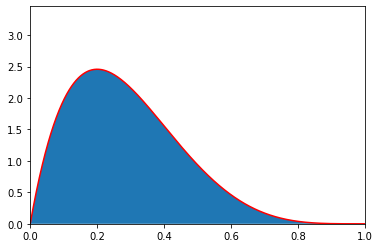

0.998997497499002


In [56]:
print(beta.probability(0, 1))

**Example:** A gasoline wholesale distributor has bulk storage tanks that hold fixed supplies and
are filled every Monday. Of interest to the wholesaler is the proportion of this supply
that is sold during the week. Over many weeks of observation, the distributor found
that this proportion could be modeled by a beta distribution with α = 4 and β = 2.
Find the probability that the wholesaler will sell at least 90% of her stock in a given
week.

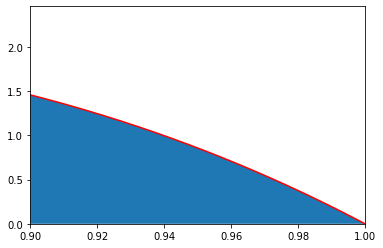

Probability that the wholesaler will sell at least 90% of her stock in a given week is: 0.0815
Expected value:  0.6666666666666666
Variance:  0.031746031746031744


In [57]:
beta = BetaDistribution(alpha = 4, beta=2)
print("Probability that the wholesaler will sell at least 90% of her stock in a given week is: " + str(round(beta.probability(0.9, 1), 4)))
print("Expected value: ",beta.expectedValue())
print("Variance: ", beta.variance())

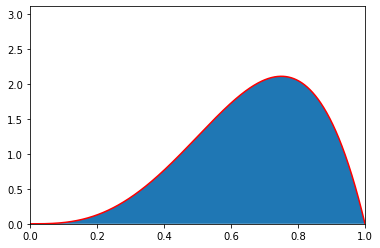

0.9989983316656669


In [58]:
print(beta.probability(0, 1))

### Beta precision

Based on the property that the sum of all probabilities of a distribution must be 1, we can notice that this distribution implementation approximates to 1. So, we can take this distribution as reliable even though the probabilities don't add up to exactly 1, but approximates it very well.

The beta distribution is often used as a model for proportions, such as the proportion of impurities in a chemical product or the proportion of time that a machine is under repair; also, for task cost and schedule modeling in project management.

# References

Wackerly D., Mendenhall W.,Scheaffer R. Mathematical Statistics with Applications (2008) ISBN: 978-0-495-38508-0

https://en.wikipedia.org/wiki/Binomial_distribution

https://en.wikipedia.org/wiki/Geometric_distribution

https://en.wikipedia.org/wiki/Hypergeometric_distribution

https://en.wikipedia.org/wiki/Poisson_distribution

https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)

https://en.wikipedia.org/wiki/Normal_distribution

https://en.wikipedia.org/wiki/Gamma_distribution

https://en.wikipedia.org/wiki/Exponential_distribution

https://en.wikipedia.org/wiki/Beta_distribution

https://github.com/scipy/scipy/blob/v1.5.1/scipy/stats/_discrete_distns.py

https://github.com/scipy/scipy/blob/v1.5.1/scipy/stats/_continuous_distns.py